## Q1.  Max heap

Implement a max heap instead of a min heap, by having the constructor explicitly pass the "comparison" operator in. Replace `min` and `del_min` by `dominant` and `del_dominant` methods. Change the classmethods to also take in the operator.

In [23]:
import subprocess
from IPython.display import Image
def dotify(l, fname):
    start = """
    digraph G {
    nodesep=0.3;
    ranksep=0.2;
    margin=0.1;
    node [shape=circle];
    edge [arrowsize=0.8];
    """
    end = "}"
    labels=dict(enumerate(l))
    for i, v in labels.items():
        if i!=0 and 2*i < len(l):
            line1 = "{} -> {}[side=left];\n".format(i, 2*i)
        else:
            line1=""
        if i!=0 and 2*i + 1 < len(l):
            line2 = "{} -> {};\n".format(i, 2*i+1)
        else:
            line2 = ""
        start = start + line1 + line2
    end = "\n".join("{}[label=\"{}\"]".format(i, labels[i]) for i in labels if i!=0) + end
    with open(fname+".dot","w") as fd:
        fd.write(start+end)
    subprocess.call(['./treeplot.sh', fname])

In [43]:
#your code here
class BinaryHeap:
    def __init__(self):
        self.storage=[None]
        self.upto=0
        
    @classmethod
    def heapify_slow(cls, it):
        inst = cls()
        for i in it:
            inst.insert(i)
        return inst
       
    @classmethod
    def heapify(cls, it, func):
        inst = cls()
        inst.storage = inst.storage + list(it)
        inst.compare = func
        fromhalfway = (len(inst.storage) - 1) // 2
        inst.upto = len(inst.storage) - 1
        counter = 0
        while (fromhalfway > 0):
            dotify(inst.storage, "onheapifyimg"+str(counter).zfill(2))
            counter += 1
            inst.sift_down(fromhalfway)
            fromhalfway -= 1
        dotify(inst.storage, "onheapifyimg"+str(counter).zfill(2))
        return inst
        
    def insert(self, value):
        self.storage.append(value)
        self.upto += 1
        self.sift_up(self.upto)

    def sift_up(self, i):
        parent = i // 2
        if parent > 0 and self.compare(self.storage[parent], self.storage[i]):
            self.storage[i], self.storage[parent] = self.storage[parent], self.storage[i]
            self.sift_up(parent)
     
    def _dom_child(self, i):
        if 2*i + 1 > self.upto:
            return 2*i
        else:
            l = self.compare(self.storage[2*i], self.storage[2*i+1])
            return 2*i + l
    
    def sift_down(self, i):
        if 2*i <= self.upto:
            child = self._dom_child(i)
            if self.compare(self.storage[i], self.storage[child]):
                self.storage[child], self.storage[i] = self.storage[i], self.storage[child]
                self.sift_down(child)
        
    def dominant(self):
        return self.storage[1]
    
    def deldominant(self):
        domval = self.storage[1]
        self.storage[1], self.storage[self.upto] = self.storage[self.upto], self.storage[1]
        self.storage.pop()
        self.upto -= 1
        self.sift_down(1)
        return domval

Lets use your code to find the minimum as well as the maximum of the old array. Run the code in the following cells and make sure you did it right...

In [44]:
data = [1,8,5,9,23,2,45,6,7,99,-5]

In [45]:
from operator import gt, lt
bh = BinaryHeap.heapify(data, lt)
print(bh.storage)
bh.dominant()

[None, 99, 23, 45, 9, 8, 2, 5, 6, 7, 1, -5]


99

In [46]:
bh = BinaryHeap.heapify(data, gt)
print(bh.storage)
bh.dominant()

[None, -5, 1, 2, 6, 8, 5, 45, 9, 7, 99, 23]


-5

In [47]:
!montage -geometry 600x300 -tile 1x6 onheapifyimg*.png onheapify.png
Image("onheapify.png")

montage: unable to open image `onheapifyimg*.png': No such file or directory @ error/blob.c/OpenBlob/2702.
montage: unable to open file `onheapifyimg*.png' @ error/png.c/ReadPNGImage/3913.
montage: missing an image filename `onheapify.png' @ error/montage.c/MontageImageCommand/1790.


## Q2. Heapsort

Heapsort is an algorithm that takes the idea of the selection sort algorithm and replces the inner loop by the use of a max-heap.

In [48]:
def selection_sort(A):
    for i in range(len(A)):
        print("<<<",A)
        min_index = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]
        print(">>>",A)

In [49]:
selection_sort(data)

<<< [1, 8, 5, 9, 23, 2, 45, 6, 7, 99, -5]
>>> [-5, 8, 5, 9, 23, 2, 45, 6, 7, 99, 1]
<<< [-5, 8, 5, 9, 23, 2, 45, 6, 7, 99, 1]
>>> [-5, 1, 5, 9, 23, 2, 45, 6, 7, 99, 8]
<<< [-5, 1, 5, 9, 23, 2, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 9, 23, 5, 45, 6, 7, 99, 8]
<<< [-5, 1, 2, 9, 23, 5, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 5, 23, 9, 45, 6, 7, 99, 8]
<<< [-5, 1, 2, 5, 23, 9, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 5, 6, 9, 45, 23, 7, 99, 8]
<<< [-5, 1, 2, 5, 6, 9, 45, 23, 7, 99, 8]
>>> [-5, 1, 2, 5, 6, 7, 45, 23, 9, 99, 8]
<<< [-5, 1, 2, 5, 6, 7, 45, 23, 9, 99, 8]
>>> [-5, 1, 2, 5, 6, 7, 8, 23, 9, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 23, 9, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]


The basic idea is this. First heapify the entire array. The max should then be the 1st element (save our placeholder None) of the heap's storage. Swap this max with the last element to store the maximum at the end. Now you've put in some new wierd value at the top of the heap and have lost the heap property. You have an additional element at the end.

In-place in the array, without making any additional allocations, consider all but the last element to be the new "heap". What method in the heap class must we use to restore the heap property?

Use this method to sort the array. Print the before and after for each iteration of the outer loop as above. What is the $O(n)$ for this method?

In [64]:
data = [1,8,5,9,23,2,45,6,7,99,-5]

In [83]:
def heap_sort(A):
    bh = BinaryHeap.heapify(data, lt)
    B = bh.storage
    last = len(B) - 1
    
    for i in range(1,len(B)):
        print("<<<",B)
        B[1], B[last] = B[last], B[1]
        bh.storage = B
        bh.upto -= 1
        bh.sift_down(1)
        
        last -= 1
        print(">>>",B)

In [84]:
heap_sort(data)

<<< [None, 99, 23, 45, 9, 8, 2, 5, 6, 7, 1, -5]
>>> [None, 45, 23, 5, 9, 8, 2, -5, 6, 7, 1, 99]
<<< [None, 45, 23, 5, 9, 8, 2, -5, 6, 7, 1, 99]
>>> [None, 23, 9, 5, 7, 8, 2, -5, 6, 1, 45, 99]
<<< [None, 23, 9, 5, 7, 8, 2, -5, 6, 1, 45, 99]
>>> [None, 9, 8, 5, 7, 1, 2, -5, 6, 23, 45, 99]
<<< [None, 9, 8, 5, 7, 1, 2, -5, 6, 23, 45, 99]
>>> [None, 8, 7, 5, 6, 1, 2, -5, 9, 23, 45, 99]
<<< [None, 8, 7, 5, 6, 1, 2, -5, 9, 23, 45, 99]
>>> [None, 7, 6, 5, -5, 1, 2, 8, 9, 23, 45, 99]
<<< [None, 7, 6, 5, -5, 1, 2, 8, 9, 23, 45, 99]
>>> [None, 6, 2, 5, -5, 1, 7, 8, 9, 23, 45, 99]
<<< [None, 6, 2, 5, -5, 1, 7, 8, 9, 23, 45, 99]
>>> [None, 5, 2, 1, -5, 6, 7, 8, 9, 23, 45, 99]
<<< [None, 5, 2, 1, -5, 6, 7, 8, 9, 23, 45, 99]
>>> [None, 2, -5, 1, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [None, 2, -5, 1, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [None, 1, -5, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [None, 1, -5, 2, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [None, -5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [None, -5, 1, 2, 5, 6, 7, 8, 9, 23, 

Heapsort executes in O(n*log(n)) since we are using sift_down which runs in log(n), n times.  The n from the initial heapify is dominated by log(n) so we can ignore it.

## Q3. Median maintenance

Median maintenance is a very cool algorithm to find an online median. 

We create two arrays to test our implementation, using `np.median` to compute our answer...

In [85]:
import random
import numpy as np

In [86]:
l = [random.randint(1,1000) for _ in range(150)]
print(len(l), np.median(l))
l2 = l + [random.randint(1,1000)]
print(len(l2), np.median(l2))

150 484.5
151 480.0


You will implement `def online_median(iterator)` which is a generaor yielding successive values of your online median. 

The algorithm is as follows:

We'll use 2 heaps, a max heap for the lower half of the data, and a min-heap for the upper half. We take the first 2values in our data and assign the smaller value to the max heap, while the larger value goes to the min-heap. Then, as we "insert" subsequent values in one of the two heaps, the following holds: if we keep the number of elements in both heaps equal (for the even case) or at-most differing by one, the median is respectively the average of the two dominants or the dominant in the heap with one xtra item.

What then is our strategy for this balanced insertion? Quite simple really: if a new value is not as dominant as the dominant value, add it to that heap. If it is more dominant, add it to the other. If two items in a row get added to the same heap, the heaps will be out of balance by more than one. In this case, take the dominant element from the larger heap and simply add it to the smaller one.

In [120]:
def add_median(max_heap, min_heap):
    # For each iteration add the median
    if len(max_heap.storage) == len(min_heap.storage):
        median = (max_heap.dominant() + min_heap.dominant()) / 2
    elif len(max_heap.storage) > len(min_heap.storage):
        median = max_heap.dominant()
    else:
        median = min_heap.dominant()
    return median

def online_median(iterator):
    medians = []
    
    # Setup with the first two values
    a = next(iterator)
    b = next(iterator)
    smaller = a if a < b else b
    larger = b if b > a else a
    max_heap = BinaryHeap.heapify([smaller], lt)
    min_heap = BinaryHeap.heapify([larger], gt)
    medians.append(add_median(max_heap, min_heap))
    i = 0
    
    for value in iterator:
        i += 1
        if value < max_heap.dominant():
            max_heap.insert(value)
        else:
            min_heap.insert(value)
            
        medians.append(add_median(max_heap, min_heap))
        
        # If we have added two then check to see if the heaps are of even length
        if i % 2 == 0:
            if len(max_heap.storage) > len(min_heap.storage):
                min_heap.insert(max_heap.deldominant())
            elif len(min_heap.storage) > len(max_heap.storage):
                max_heap.insert(min_heap.deldominant())
        
    return medians

Do your answers match?

484.5


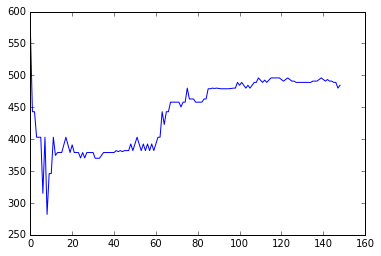

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
medians = list(online_median(iter(l)))
print(medians[-1])
plt.plot(medians)

In [123]:
list(online_median(iter(l2)))[-1]

480

What is the $O(n)$ behavior of this median maintenance algorithm?

This algorithm loops over all the elements O(n), with each iteration calling insert which has a cost of O(log(n)).  So combined it is O(n * log(n)).

Lastly, lets repeat the analysis we did last time on the randomly generated data.

In [124]:
from random import normalvariate, random
from itertools import count
def make_data(m, stop=None):
    for _ in count():
        if stop and _ > stop:
            break
        yield 1.0e09 + normalvariate(0, m*random() )

In [125]:
g = online_median(make_data(5, 100))
print(type(g))
out = list(g)
out[-10:]

<class 'list'>


[1000000000.0090489,
 1000000000.0004736,
 1000000000.0047612,
 1000000000.0004736,
 1000000000.0004736,
 1000000000.0004736,
 1000000000.0004736,
 1000000000.0090489,
 1000000000.0090489,
 1000000000.0124152]

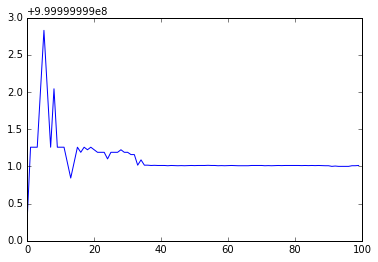

In [126]:
plt.plot(out)